# 사이킷런의 의사결정나무 알고리즘 알아보기

- 학습목표
    - 사이킷런으로 의사결정나무(Decision Tree) 모델을 만드는 방법을 이해합니다.

- 핵심 키워드
    - 사이킷런
    - Decision Tree
    - fit, predict
    - graphviz 라이브러리

In [3]:
from sklearn import tree

`지도학습`의 `분류`기법을 통해 새로 들어온 고객이 물건을 구매할지, 구매하지 않을지를 분류하는 문제를 풀 수 있다.

분류 기법중에서 Decision Tree(의사결정나무) 알고리즘을 활용해보겠습니다.
Decision Tree는 CART(Classification and Regression Tree) 알고리즘이라고도 불립니다.

사이킷런 라이브러리르 소개하는 사이트에 가면 사용 예제가 나와 있습니다.

[사이킷런 공식홈페이지](https://scikit-learn.org/stable/)

In [4]:
# 사이킷런 패키지를 활용해 tree패키지를 불러옵니다.
# tree 패키지 안에는 DecisionTreeClassifier (의사결정트리 분류) 모듈이 있습니다.
X = [[0, 0], [1, 1]]
Y = [0, 1]

In [6]:
# clf 에 DecisionTreeClassifier 모델 객체를 선언한 후, 설정 가능한 parameter들을 확인할 수 있습니다.
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [7]:
# fit 함수를 통해 모델을 학습하고 저장합니다.
clf = clf.fit(X, Y)
clf

DecisionTreeClassifier()

In [8]:
clf.predict([[2., 2.]])

array([1])

In [9]:
# predict_proba 함수를 사용하면 값이 비율로 출력됩니다.
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [11]:
# 데이터셋이 라이브러리에 이미 내장된 경우도 있습니다.
# Decision Tree 알고리즘은 숫자만 이해할 수 있기 때문에 0, 1, 2로 카테고리가 구분됩니다.
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y = True)

## iris 데이터프레임화 시키기

In [32]:
temp1 = []
temp2 = []
temp3 = []
temp4 = []

for a in X:
    temp1.append(a[0])
    temp2.append(a[1])
    temp3.append(a[2])
    temp4.append(a[3])

In [35]:
import pandas as pd
df_iris = pd.DataFrame({
    'x1': temp1,
    'x2': temp2,
    'x3': temp3,
    'x4': temp4,
    'y': y
})

In [39]:
df_iris.head(3)

,x1,x2,x3,x4,y
0,6.1,4.5,2.4,1.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [41]:
# 의사결정나무 모델을 선언한 후에 fit 함수를 통하여 학습을 진행한다.
# 각 붓꽃들의 특성(x1, x2, x3, x4)들을 넣어주면 그 붓꽃의 품종인 [0, 1, 2] 를 정답데이터셋으로 넣어주게 된다.
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

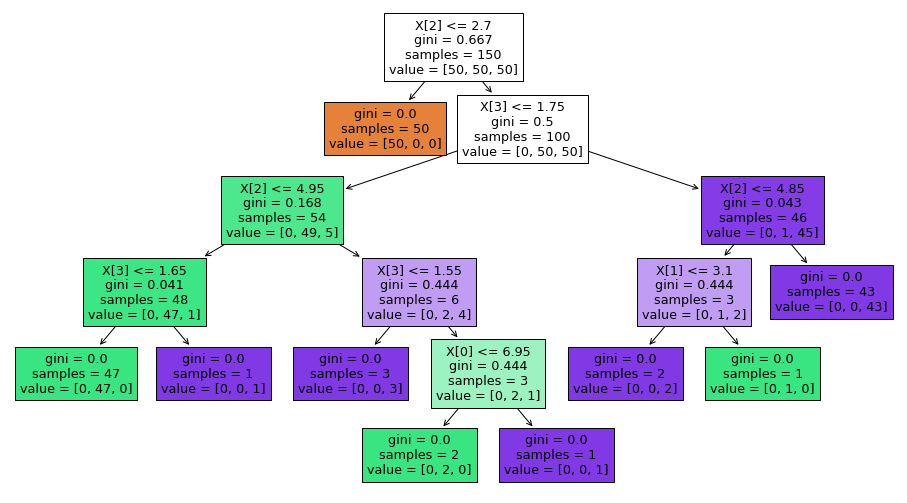

In [67]:
# 예제에 있던 iris.data, iris.target를 X, y로 바꾸어 시각화를 합니다.
# filled = True 로 설정하면 사이트에 나온 색상과 동일하게 나타납니다.
import matplotlib.pyplot as plt

plt.figure(figsize = (16, 9))
t = tree.plot_tree(clf.fit(X, y), filled=True)

In [60]:
!pip install graphviz

In [65]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
# graph.render('iris')